In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#import tensorFlow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from scipy.stats import norm
from sklearn import preprocessing , linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from random import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pylab as pl
%matplotlib inline

In [2]:
names=[str(i) for i in range(1,66)]

In [3]:
df_Train = pd.read_csv("C:/Users/Andrea1/Desktop/project3/environment3/optdigits_tra.csv", names=names, index_col=False)

df_Test = pd.read_csv("C:/Users/Andrea1/Desktop/project3/environment3/optdigits_tes.csv", names=names,index_col=False)


In [10]:
from sklearn.datasets import load_digits
digits =load_digits()
X_test=digits.data
y_test=digits.target

<p style="text-align: justify;">
#                Reconocimiento Óptico de Dígitos escrito a mano


<p align="center">
## Andrea Vargas Gutiérrez 132192



## Introducción. 

<p style="text-align: justify;">
En este projecto se utilizarán varias técnicas de Aprendizaje de Máquina para reconocer distintos dígitos escritos a mano. La base con la que se trabaja fue preprocesada por programas hechos por NIST para extraer mapas de bits normalizados de digitos escritos a mano. 
</p>
  Para la formación de la base de datos, participaron 43 personas distintas, de las cuales 30 contribuyen al set de entrenamiento del modelo y 13 distintas al set de prueba. Esto de tal forma que no entrenemos el modelo con los mismos tipos de escritura de cierta persona. 


   ###### Datos
<p style="text-align: justify;">
  Los datos se encontraban previamente divididos en Test y Train.
    Fueron descargados de https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/
    Se utilizó el archivo optdigits.tes para los datos de prueba y optdigits.tra para el set de entrenamiento.
    (3823 en training set  y 1797 datos en test set)

</p>
   Para la representación gráfica de los números se utilizó el set de datos digits proporcionado por sklearn, el cual coincide con los datos descargados para el set de prueba.

   ###### Forma en que se presentan los datos:

   Los mapas de bits se normalizaron a un tamaño de 32x32. Estos se dividieron en bloques disjuntos de 4x4. Esto da como resultado una matriz de 8x8 donde cada elemento, contiene el número de pixeles activos para cada bloque, es decir un número entre el 0 y 16.

Las representaciones gráficas de los números del 0 al 9 se ven de la siguiente manera.


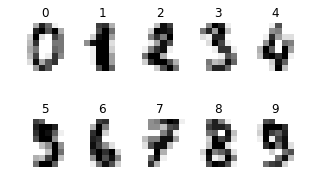

In [11]:
images_and_labels=list(zip(digits.images,digits.target))
plt.figure(figsize=(5,5))
for index, (image,label) in enumerate (images_and_labels[:10]):
        plt.subplot(3,5, index+1)
        plt.axis("off")
        plt.imshow(image,cmap=plt.cm.gray_r, interpolation ="nearest")
        plt.title('%i' % label)

In [12]:
X_train=np.array(df_Train.drop('65', axis=1))
y_train=np.array(df_Train['65'])



## Metodología



Los números escritos a mano pertenecientes a la misma clasificación pueden tener formas muy distintas entre sí. Para ver ésto más claro, se presentan gráficamente los primeros 10 números "5". 

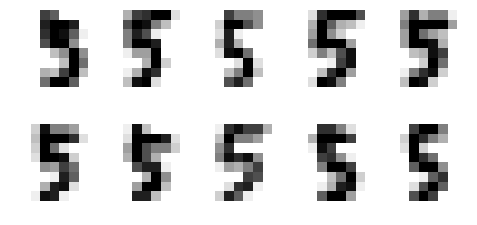

In [13]:
cincos=y_test==5
indicesCinco=cincos.nonzero()
indicesCinco=indicesCinco[0]
imagenesCinco=[]
EtiquetasCinco=[]
for i in indicesCinco[:10]:
    imagenesCinco.append(digits.images[i])
    EtiquetasCinco.append(digits.target[i])
plt.figure(figsize=(8,8))
for index, image in enumerate (imagenesCinco):
        plt.subplot(4,5, index+1)
        plt.axis("off")
        plt.imshow(image,cmap=plt.cm.gray_r, interpolation ="nearest")
        plt.legend()

<p style="text-align: justify;">
La metodología que usaremos, pretende reconocer las características generales para cada una de las etiquetas (números) de nuestros datos y así predecir a qué numero corresponde una nueva representación gráfica. Para hacer esto utilizaremos 3 modelos:  Bosques aleatorios, K vecinos cercanos y Maquinas de soporte vectorial.
</p>

#### Estimación de Hiperparámetros 

<p style="text-align: justify;">
Para determinar los hiperparámetros, se dividieron los datos en 5 bloques y se utilizó VALIDACION CRUZADA para determinar la precisión del modelo. Se optó por éste método de estimación porque realiza una prueba sobre datos "no vistos" y promedia sobre varias pruebas con los datos. Con esto se espera que los hiperparámetros elegidos sirvan para describir mejor los nuevos datos. 

<p style="text-align: justify;">
Para el modelo de Bosques aleatorios se establecio como hiperparámetro  el número de árboles en el bosque, probando con un rango de 40 a 90 arboles con saltos de tamaño 10. Se obtuvo que el parámetro que tiene una mayor presición media es con 60 arboles. Más adelante se presentarán las gráficas con las distintas exactitudes promedio que se utilizaron para la elección de los hiperparámetros óptimos.

<p style="text-align: justify;">
Para el caso de Knn-neighbors el hiperparámetro del modelo fue el número de vecinos que se tomaría en cuenta para la clasificación de la nueva observación.  Se utilizó un rango de 1 a 15 vecinos y se obtuvo una precisión máxima en 1 vecino cercano. Después presenta otro pico en 3 vecinos cercanos y luego, como es de esperarse, tiene una tendencia descendente con más vecinos ya que el modelo se sobreajusta.

<p style="text-align: justify;">
En el modelado de SVM se utilizó como hiperparámetro el tipo de Kernel del modelo. Se propusieron las siguientes opciones:
'linear', 'rbf' , 'sigmoid' y 'Polinomial'. Para el tipo de Kernel Polinomial se probó ajustando distintos grados del polinomio (del 2 al 6). 



##### Graficas de hiperparámetros

###### Random Forest 

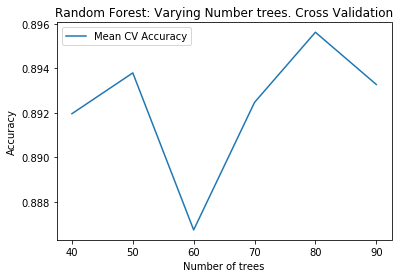

In [14]:
estimadores=[40,50,60,70,80,90]

RFAccuracy = np.empty(len(estimadores))

# Loop over different values of estimators
for i, k in enumerate(estimadores):
    # Setup a Random Forest Classifier with n estimators: randomforest
    randomforest=RandomForestClassifier(n_estimators=k, max_leaf_nodes=10)
    cvScore=cross_val_score(randomforest,X_train,y_train,cv=5)    
    #Compute accuracy on the training set
    RFAccuracy[i] = np.mean(cvScore)
plt.title('Random Forest: Varying Number trees. Cross Validation')
plt.plot(estimadores, RFAccuracy, label = 'Mean CV Accuracy')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

###### Knn

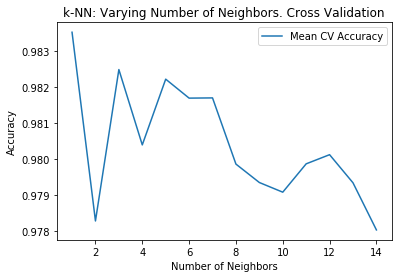

In [15]:
neighbors = np.arange(1, 15) #Probaremos la exactitud del modelo con 1 a 9 vecinos
train_accuracy = np.empty(len(neighbors))
KnnAccuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    cvScore=cross_val_score(knn,X_train,y_train,cv=5)    
    #Compute accuracy on the training set
    KnnAccuracy[i] = np.mean(cvScore)

plt.title('k-NN: Varying Number of Neighbors. Cross Validation')
plt.plot(neighbors, KnnAccuracy, label = 'Mean CV Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

###### SVM

In [16]:
Kernels = np.array([ 'linear', 'rbf', 'sigmoid']) #Probaremos la exactitud del modelo con las funciones Linear, rbf, sigmoid

train_accuracy = np.empty(7)
test_accuracy = np.empty(7)

# Loop over different values of k
for i, k in enumerate(Kernels):
    svm= SVC(C=1,kernel=str(k))
    cvScore=cross_val_score(svm,X_train,y_train,cv=5)
    print(k +" mean accuracy with 5 folds: "+ str(np.mean(cvScore)))
# Loop over different values of degree
pol=[]
Degree=np.array([2,3,4,5,6])
for i, deg in enumerate(Degree):
    svm= SVC(C=1,kernel='poly',degree=deg)
    cvScore=cross_val_score(svm,X_train,y_train,cv=5)
    prom=np.mean(cvScore)
    pol.append(prom)
    if i==2:
        print("Poly degree= "+ str(i+2) +" mean accuracy with 5 folds: "+ str(prom))


linear mean accuracy with 5 folds: 0.978021822526
rbf mean accuracy with 5 folds: 0.665490158453
sigmoid mean accuracy with 5 folds: 0.10175281863
Poly degree= 4 mean accuracy with 5 folds: 0.988486309644


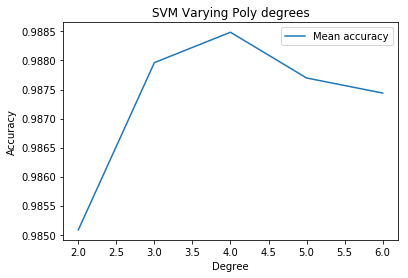

In [17]:
plt.title('SVM Varying Poly degrees')
plt.plot(Degree,pol, label="Mean accuracy")
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.show()

Una vez seleccionados los hiperparámetros, se entrenan los distintos modelos con todos los datos de entrenamiento. Ahora es momento de probar qué tan buenos fueron nuestros modelos para predecir nuevas observaciones nunca antes vistas.


## Resultados

###### RANDOM FOREST

El modelo de bosque aleatorio presentó una precisión de predicción del 88.7% lo cual representa un buen desempeño. Se presenta la matriz de confusión y un reporte de indicadores para ver el desempeño del modelo. Puede verse como los números 9 y 1 tuvieron mayor indice de error, confundiendose principalmente con el número 3 y 9 respectivamente

In [18]:
########################### Random Forest #######################
RFC=RandomForestClassifier(n_estimators=60, max_leaf_nodes=10)
RFC.fit(X_train,y_train)
RFAccuracy=RFC.score(X_test,y_test)
print("Random Forest accuracy: "+str(RFAccuracy))
print()

print(confusion_matrix(y_test,RFC.predict(X_test)))
print(classification_report(y_test,RFC.predict(X_test)))

Random Forest accuracy: 0.889259877574

[[176   0   0   0   2   0   0   0   0   0]
 [  0 139  15   3   1   1  10   2   0  11]
 [  1   2 164   4   0   0   2   3   0   1]
 [  1   2   3 164   0   3   0   5   2   3]
 [  0   1   0   0 166   0   2  12   0   0]
 [  4   0   0   0   1 156   2   1   2  16]
 [  2   1   0   0   1   0 176   0   1   0]
 [  0   0   0   0   6   1   0 166   1   5]
 [  2   8   8   3   3   1   0   6 141   2]
 [  1   1   0  16   1   1   0   9   1 150]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96       178
          1       0.90      0.76      0.83       182
          2       0.86      0.93      0.89       177
          3       0.86      0.90      0.88       183
          4       0.92      0.92      0.92       181
          5       0.96      0.86      0.90       182
          6       0.92      0.97      0.94       181
          7       0.81      0.93      0.87       179
          8       0.95      0.81      0.88       17

De las 199 predicciones incorrectas, se presentan las representaciones gráficas de las primeras 20 para juzgar personalmente qué tan legible era realmente el número presentado.  Con estas representaciones podemos ver como por ejemplo, los 9 y los 5 realmente parecen tener una relación gráfica muy similar.

199 predicciones incorrectas
Primeras 20 predicciones incorrectas


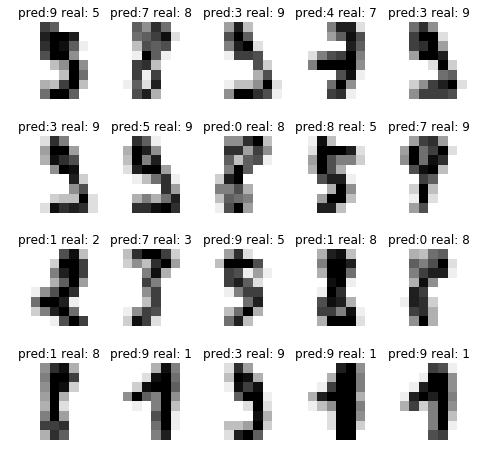

In [20]:
#################### RANDOM FOREST #####################

diferentesrf=RFC.predict(X_test)!=y_test
indicesmalrf=diferentesrf.nonzero()
indicesmalrf=indicesmalrf[0].tolist()
imagenesmalrf=digits.images[[indicesmalrf]]
datosmalrf=X_test[[indicesmalrf],:]
etiquetasmalrf=digits.target[[indicesmalrf]]
prediccionesmalrf=RFC.predict(datosmalrf[0])
RF_mal=len(indicesmalrf)
print(str(RF_mal)+" predicciones incorrectas")
print("Primeras 20 predicciones incorrectas")
#print("etiqueta real: "+ str(etiquetasmalrf[:25]))
#print("prediccion:    "+ str(prediccionesmalrf[:25]))


plt.figure(figsize=(8,8))
images_and_labelsrf=list(zip(imagenesmalrf,etiquetasmalrf))
for index, (image,label) in enumerate (images_and_labelsrf[:20]):
        plt.subplot(4,5, index+1)
        plt.axis("off")
        plt.imshow(image,cmap=plt.cm.gray_r, interpolation ="nearest")
        plt.title("pred:" '%i' %  prediccionesmalrf[index]+" real: " +str( etiquetasmalrf[index]))
        plt.legend()

###### Knn

Usando el método de K vecinos cercanos podemos ver cómo se incrementa la precisión del modelo en comparación del bosque aleatorio. Para este modelo la precisión es de 97% presentando únicamente36 diagnosticos incorrectos de 1797 nuevas observaciones. El número más confundido con éste modelo es nuevamente el 9 y el 8

In [21]:
################################### KNN #############3
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)    
knn_accuracy = knn.score(X_test, y_test)
print("Knn accuracy: "+str(knn_accuracy))

print(confusion_matrix(y_test,knn.predict(X_test)))

print(classification_report(y_test,knn.predict(X_test)))

Knn accuracy: 0.979966611018
[[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   0   0   1   0]
 [  0   2 175   0   0   0   0   0   0   0]
 [  0   0   0 179   0   0   0   2   0   2]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   0   1 179   0   0   0   2]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 177   0   2]
 [  0   8   0   1   0   0   0   0 164   1]
 [  0   0   0   3   3   2   0   0   3 169]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.94      0.99      0.97       182
          2       1.00      0.99      0.99       177
          3       0.98      0.98      0.98       183
          4       0.98      0.98      0.98       181
          5       0.99      0.98      0.99       182
          6       1.00      1.00      1.00       181
          7       0.99      0.99      0.99       179
          8       0.97      0.94      0.96       174
         

36 predicciones incorrectas
A continuación se presentan los primeros 20 errores del modelo


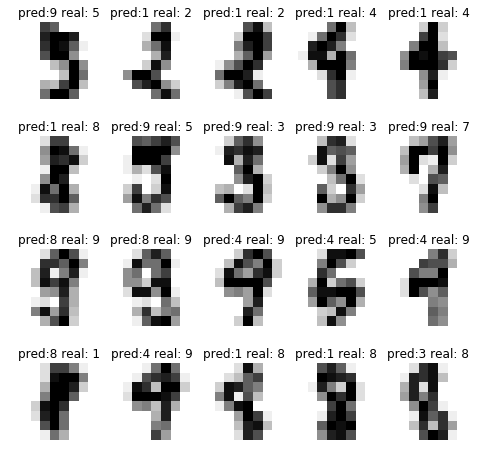

In [24]:
diferentes=knn.predict(X_test)!=y_test
indicesmal=diferentes.nonzero()
indicesmal=indicesmal[0].tolist()
Knn_mal=len(indicesmal)
print(str(Knn_mal)+" predicciones incorrectas")
print("A continuación se presentan los primeros 20 errores del modelo")

predicciones=knn.predict(digits.images.reshape(X_test.shape))
imagenesmal=[]
etiquetasmal=[]
prediccionesmal=[]
for i in indicesmal:
    imagenesmal.append(digits.images[i])
    etiquetasmal.append(digits.target[i])
    prediccionesmal.append(predicciones[i])
    
plt.figure(figsize=(8,8))
images_and_labels=list(zip(imagenesmal,etiquetasmal))
for index, (image,label) in enumerate (images_and_labels[:20]):
        plt.subplot(4,5, index+1)
        plt.axis("off")
        plt.imshow(image,cmap=plt.cm.gray_r, interpolation ="nearest")
        plt.title("pred:" '%i' %  prediccionesmal[index]+" real: " +str( etiquetasmal[index]))
        plt.legend()
        


###### SVM

Ahora entrenaremos el modelo utilizando el metodo SVM. Para esto se eligió un Kernel polinomial de grado 4. 

La precisión de este modelo es poco menor a la de k vecinos sin embargo sigue siendo muy alta 97% . Para este set de datos se clasificaron mal 44 números. Siendo los más confundido el 7,8 y nuevamente el 9

In [25]:
svm= SVC(C=1,kernel='poly',degree=4)
svm.fit(X_train,y_train)
print("test accuracy: " +str(svm.score(X_test,y_test))  )  
confusion_matrix(y_test,svm.predict(X_test))
    

test accuracy: 0.9755147468


array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 180,   0,   0,   0,   0,   1,   0,   1,   0],
       [  0,   1, 176,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 176,   0,   1,   0,   1,   2,   2],
       [  0,   0,   0,   0, 179,   0,   0,   0,   1,   1],
       [  1,   0,   0,   0,   0, 180,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   4,   0, 169,   0,   6],
       [  0,   6,   0,   1,   0,   1,   0,   0, 162,   4],
       [  0,   0,   0,   4,   0,   3,   0,   0,   1, 172]], dtype=int64)

In [26]:
print(classification_report(y_test,svm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       178
          1       0.96      0.99      0.98       182
          2       0.99      0.99      0.99       177
          3       0.97      0.96      0.97       183
          4       1.00      0.99      0.99       181
          5       0.95      0.99      0.97       182
          6       0.99      1.00      1.00       181
          7       0.99      0.94      0.97       179
          8       0.97      0.93      0.95       174
          9       0.92      0.96      0.94       180

avg / total       0.98      0.98      0.98      1797



In [28]:
diferentes=svm.predict(X_test)!=y_test
indicesmal=diferentes.nonzero()
indicesmal=indicesmal[0].tolist()
imagenesmal=digits.images[[indicesmal]]
datosmal=X_test[[indicesmal],:]
etiquetasmal=digits.target[[indicesmal]]
prediccionesmal=svm.predict(datosmal[0])
#print("etiqueta real: "+ str(etiquetasmal))
#print("prediccion:    "+ str(prediccionesmal))

In [29]:
svm_mal=len(indicesmal)

In [32]:
print(str(svm_mal)+" predicciones mal")
print("Primeras 20 predicciones incorrectas")

44 predicciones mal
Primeras 20 predicciones incorrectas


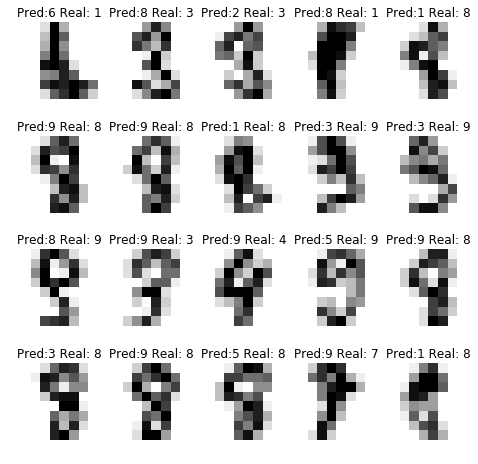

In [31]:
plt.figure(figsize=(8,8))
images_and_labels=list(zip(imagenesmal,etiquetasmal))
for index, (image,label) in enumerate (images_and_labels[15:35]):
        plt.subplot(4,5, index+1)
        plt.axis("off")
        plt.imshow(image,cmap=plt.cm.gray_r, interpolation ="nearest")
        plt.title("Pred:" '%i' %  prediccionesmal[index+15]+" Real: " +str( etiquetasmal[index+15]))
        plt.legend()

Dado lo observado en los 3 modelos, se decidió hacer una muestra de números 9 para poder ver por qué presentan tanto error en la clasificación

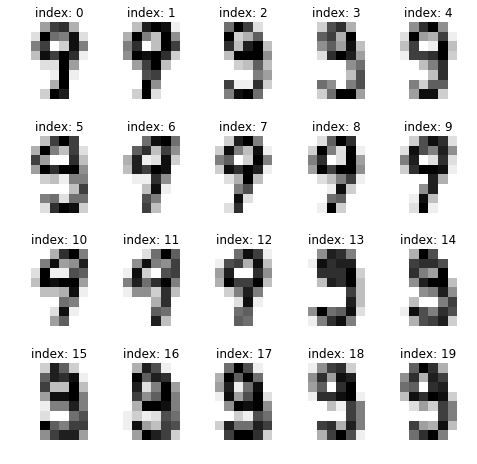

In [33]:
cincos=y_test==9
indicesCinco=cincos.nonzero()
indicesCinco=indicesCinco[0]
imagenesCinco=[]
EtiquetasCinco=[]
for i in indicesCinco[25:45]:
    imagenesCinco.append(digits.images[i])
    EtiquetasCinco.append(digits.target[i])
plt.figure(figsize=(8,8))
for index, image in enumerate (imagenesCinco):
        plt.subplot(4,5, index+1)
        plt.axis("off")
        plt.imshow(image,cmap=plt.cm.gray_r, interpolation ="nearest")
        plt.title("index: " '%i' %  index)
        plt.legend()

Después de ver las distintas representaciones del número 9 podemos entender por qué resulta el número más confundido. Por ejemplo, en el 6to número podría confundirse con un 4 o el ejemplo 17 o 14 podrían ser un 8. 

## Conclusion

Los modelos presentados tuvieron una alta tasa de predicciones correctas. Esto es debido a que los elementos que se modelan son bastante uniformes y estandarizados. Es decir, no tienen mucho ruido y no se presentan sobre ajustes ni bajo ajustes por la selección de las variables en los modelos. Esto también debido a que no hay variables (columnas) linealmente dependientes de otras. 

Si bien es un ejercicio simple en cuanto a elección de variables para tomar en cuenta en el modelo, tiene detrás un gran trabajo en la estandarización de los datos y modelado de las representaciones gráficas como arreglos para poder ser utilizados en los modelos predictivos.

La elección de los hiperparámetros también juega un papel importante para uno correcto entrenamiento del modelo. Esto se puede ver principalmente en el método de SVM en el que se puede llegar a tener un 97.5% de precisión o un 60% o 10% si se elige un mal Kernel

## Referencias

- Presentaciones del profesor Fernando Esponda para el curso Aprendizaje de Máquina, Otoño 2017 , ITAM
- https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/